In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
import numpy as np
from LinearMPC.MPCVelControl import MPCVelControl
from LinearMPC.utils import GAMA, VX, VY, VZ
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 0.05
sim_time = 7
H = 5.0
nx = 12
x0 = np.array(nx * [0], dtype=float)

x_target = np.array(nx * [0], dtype=float)
x_target[VX] = 3
x_target[VY] = 3
x_target[VZ] = 3
x_target[GAMA] = np.deg2rad(35)

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, x_target=x_target, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 0.5
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=x_target.reshape(-1, 1).repeat(u_cl.shape[1], axis=1),
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Computing maximum invariant set ...
Maximum invariant set successfully computed after 10 iterations.
Computing maximum invariant set ...
Maximum invariant set successfully computed after 10 iterations.
Computing maximum invariant set ...
Maximum invariant set successfully computed after 1 iterations.
Computing maximum invariant set ...
Maximum invariant set successfully computed after 24 iterations.


/Users/jverbois/Python/epfl/MPC-Course-EPFL/.venv/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=139), IntSlider(value=0, max=13…

{'fig': <Figure size 640x480 with 16 Axes>,
 'axes': [<Axes: ylabel='inputs'>,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Y'}>,
  <Axes: title={'center': 'Subsystem X'}, ylabel='$\\omega_{\\alpha\\beta\\gamma}$ (deg/s)'>,
  <Axes: title={'center': 'Subsystem Roll'}>,
  <Axes: >,
  <Axes: ylabel='$\\alpha\\beta\\gamma$ (deg)'>,
  <Axes: >,
  <Axes: ylabel='$v$ (m/s)'>,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Z'}>,
  <Axes: ylabel='$\\text{pos}$ (m)'>,
  <Axes: >,
  <Axes: >],
 'plotter': <pyvista.plotting.plotter.Plotter at 0x17bc64b90>,
 'scene_objects': {'rocket_actor': Actor (0x17b6577c0)
    Center:                     (0.32006999999999997, -0.0015085000000000237, 0.5884844999999999)
    Pickable:                   True
    Position:                   (0.0, 0.0, 0.0)
    Scale:                      (1.0, 1.0, 1.0)
    Visible:                    True
    X Bounds                    -6.402E-01, 1.280E+00
    Y Bounds                    -1.212E+0

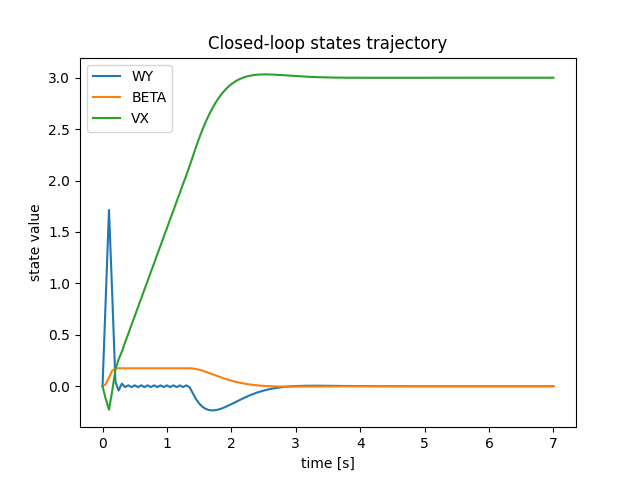

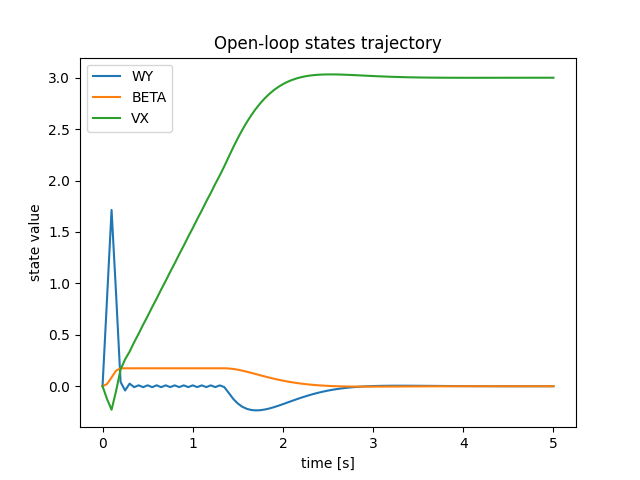

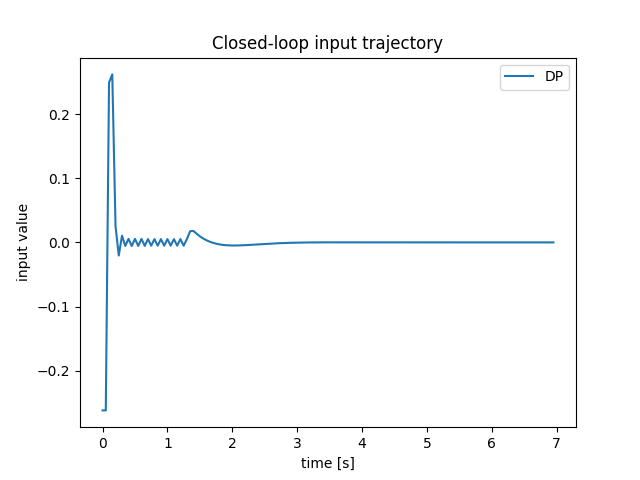

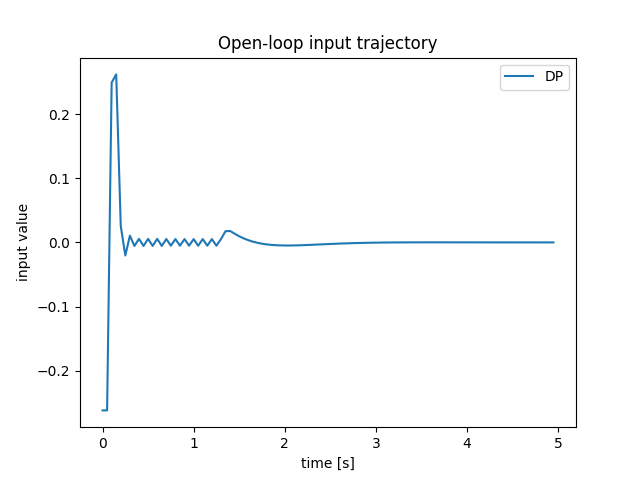

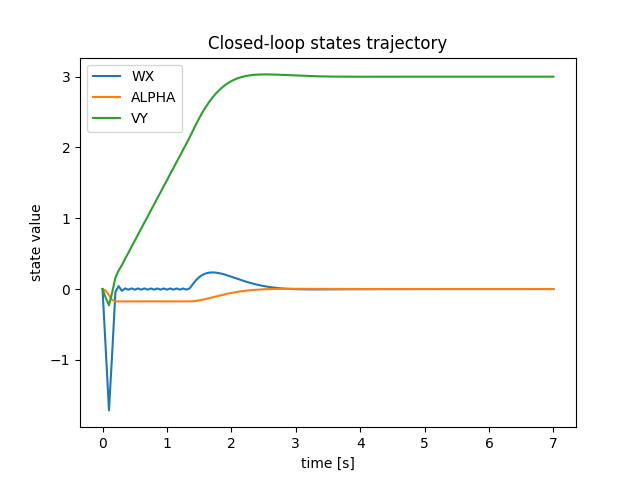

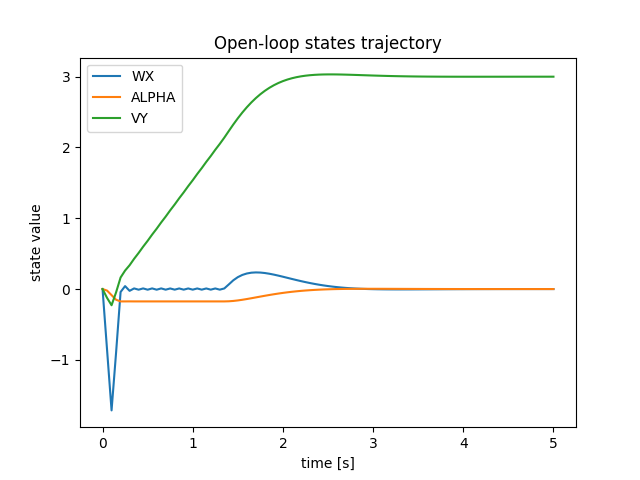

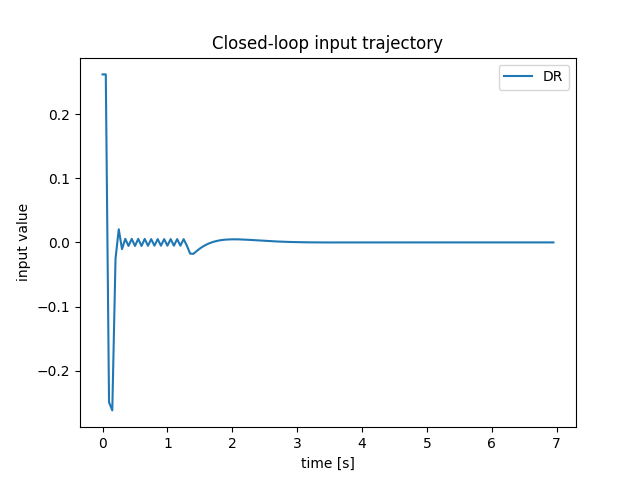

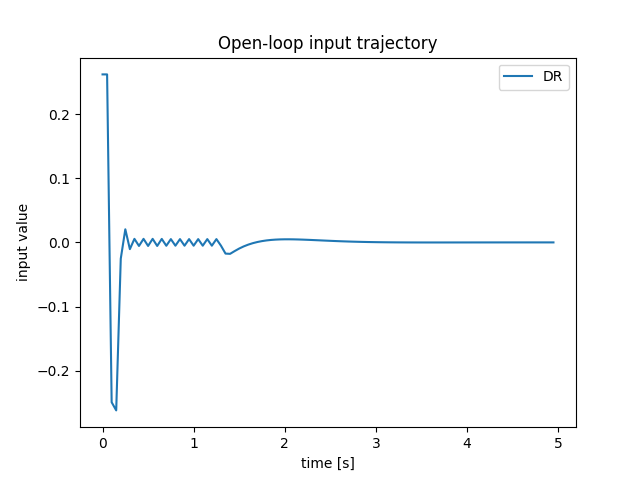

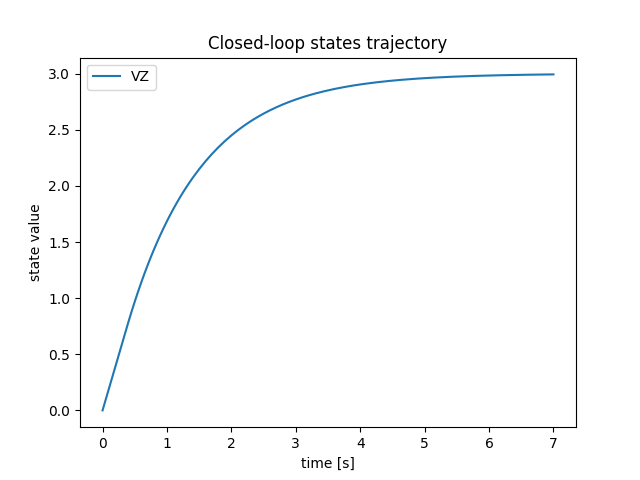

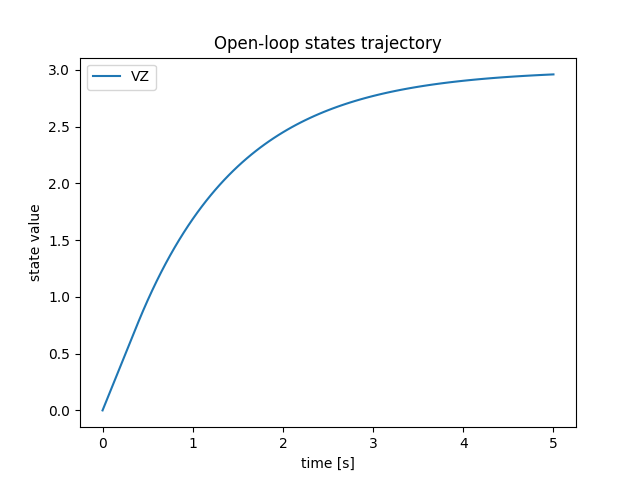

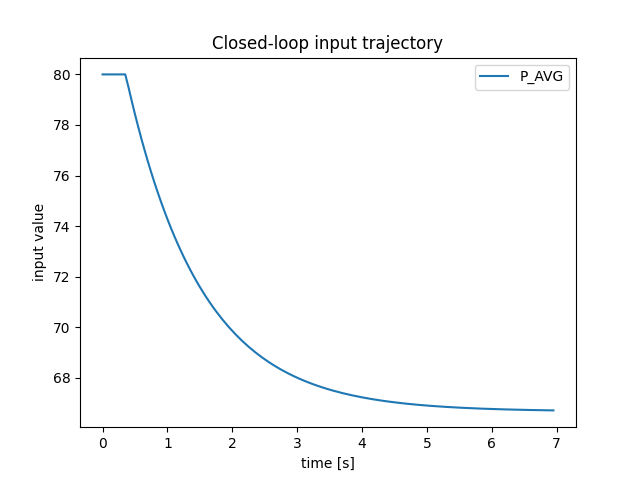

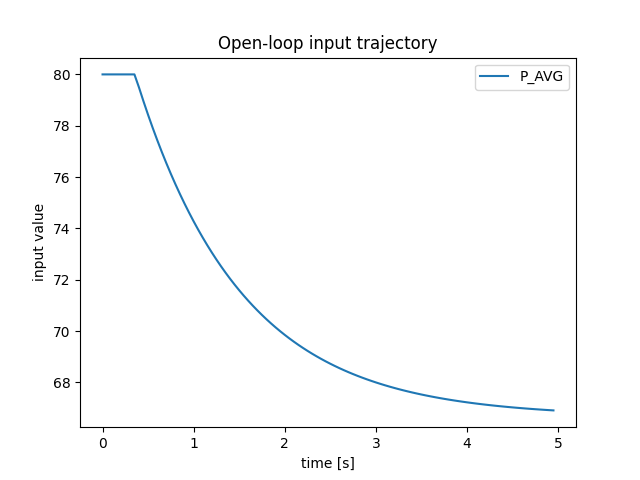

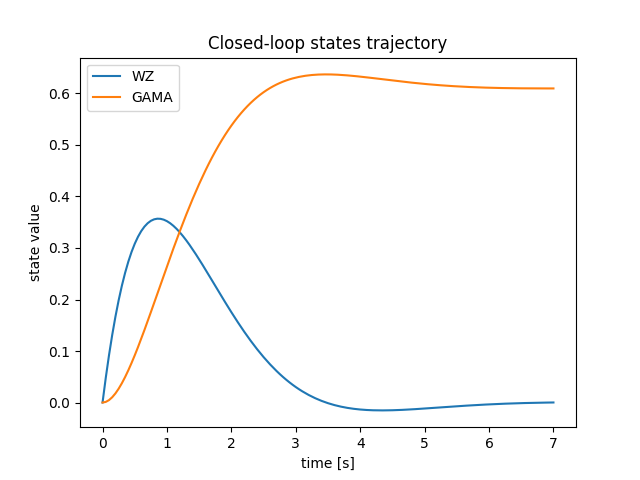

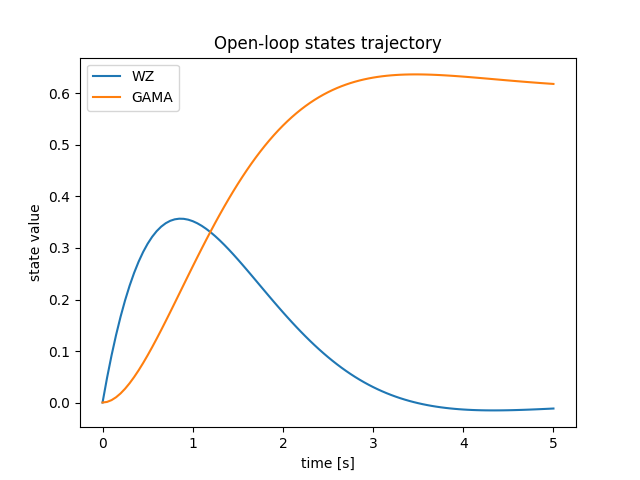

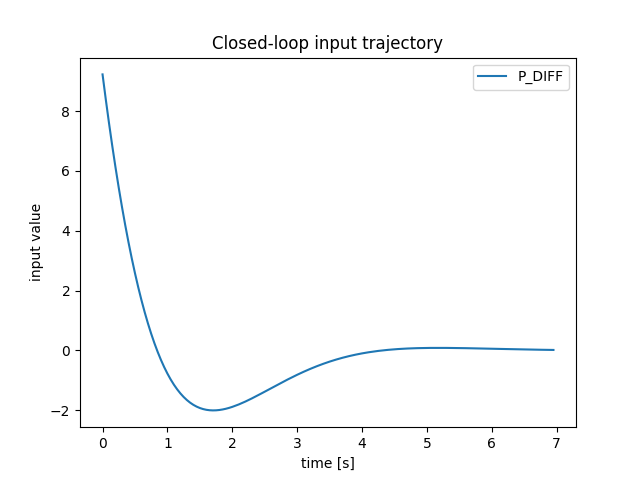

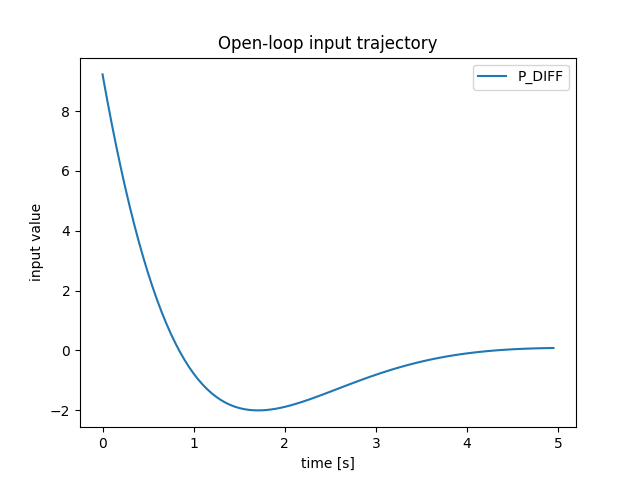

In [4]:
from LinearMPC.utils import plot_trajectory

plot_trajectory(t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, mpc.mpc_x)
plot_trajectory(t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, mpc.mpc_y)
plot_trajectory(t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, mpc.mpc_z)
plot_trajectory(t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, mpc.mpc_roll)